<a href="https://colab.research.google.com/github/LaraAyrolla/AI-Core/blob/main/models/selfie-hat-analysis/N%C3%BAcleo_de_IA_Modelo_de_An%C3%A1lise_de_Selfies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Visão Computacional - Modelo de Análise de Selfies Com Chapéu**

### **Nova seção**

*   Com chapéu (1)
*   Sem chapéu (0)

In [1]:
# Imports
import cv2
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
# Função para carregar as imagens e ajustar o tamanho delas
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))
            img = img_to_array(img)
            img = img / 255.0
            images.append(img)
    return np.array(images)

In [3]:
# Carregar as imagens e definir o valor atribuído a elas para o modelo (0 ou 1)
hat_dir = '/content/hat'
hat_images = load_images_from_folder(hat_dir)
hat_labels = np.ones(len(hat_images))

no_hat_dir = '/content/no_hat'
no_hat_images = load_images_from_folder(no_hat_dir)
no_hat_labels = np.zeros(len(no_hat_images))

In [4]:
# Juntar as imagens e valores atribuídos das duas metades da base de dados
X = np.concatenate((hat_images, no_hat_images))
Y = np.concatenate((hat_labels, no_hat_labels))

In [5]:
# Separar os dados para treino e para teste
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [6]:
# Arquitetura do modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Alterar as imagens para aumentar e diversificar a base e aplicar aos dados de treino
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False
)

datagen.fit(xtrain)

In [9]:
# Treino do modelo
history = model.fit(datagen.flow(xtrain, ytrain, batch_size=32), validation_data=(xtest, ytest), epochs=25, verbose=1)

Epoch 1/25
1/1 [==============================] - 4s 4s/step - loss: 0.6598 - accuracy: 0.6250 - val_loss: 28.8121 - val_accuracy: 0.5000
Epoch 2/25
1/1 [==============================] - 1s 1s/step - loss: 29.1529 - accuracy: 0.5000 - val_loss: 8.5583 - val_accuracy: 0.5000
Epoch 3/25
1/1 [==============================] - 3s 3s/step - loss: 9.9043 - accuracy: 0.5000 - val_loss: 1.7297 - val_accuracy: 0.5000
Epoch 4/25
1/1 [==============================] - 1s 1s/step - loss: 1.7865 - accuracy: 0.3750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/25
1/1 [==============================] - 1s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/25
1/1 [==============================] - 1s 1s/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.9919 - val_accuracy: 0.5000
Epoch 7/25
1/1 [==============================] - 1s 1s/step - loss: 0.8187 - accuracy: 0.6250 - val_loss: 5.0147 - val_accuracy: 0.5000
Epoch 8/25
1/1 [=======================

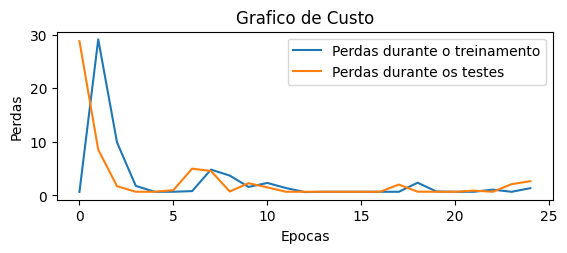

In [10]:
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'],label= 'Perdas durante o treinamento')
plt.plot(history.history['val_loss'],label= 'Perdas durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()

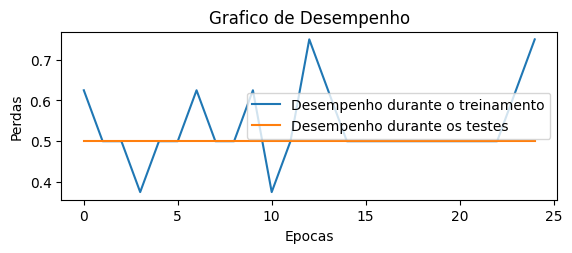

In [11]:
plt.subplot(212)
plt.title('Grafico de Desempenho')
plt.plot(history.history['accuracy'],label= 'Desempenho durante o treinamento')
plt.plot(history.history['val_accuracy'],label= 'Desempenho durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()

In [12]:
# Probabilidades previstas durante os testes
predicted = model.predict(xtest, verbose=0)
predicted

array([[0.99954796],
       [0.99522746]], dtype=float32)

In [13]:
# Matriz de confusão

print(confusion_matrix(ytest.astype(int), predicted.round().astype(int)))

[[0 1]
 [0 1]]


In [14]:
# ROC AUC
auc = roc_auc_score(ytest, predicted)
print('ROC AUC: %f' % auc)


ROC AUC: 1.000000


In [15]:
# Previsões arredondadas
predicted = predicted.round()

In [16]:
# Métricas finais
print("Valores reais: ", ytest)
print("Valores previstos pela RNA: ", predicted)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(ytest, predicted)))

print('Precision: {:.2f}'.format(precision_score(ytest, predicted, average='micro', zero_division=0)))
print('Recall: {:.2f}'.format(recall_score(ytest, predicted, average='micro', zero_division=0)))
print('F1-score: {:.2f}\n'.format(f1_score(ytest, predicted, average='micro', zero_division=0)))

#relatório com métricas de testes do modelo
from sklearn.metrics import classification_report
print('\nRelatório de classificação\n')
print(classification_report(ytest, predicted, target_names=['Com Chapéu', 'Sem Chapéu'], zero_division=0))

Valores reais:  [1. 0.]
Valores previstos pela RNA:  [[1.]
 [1.]]

Accuracy: 0.50

Precision: 0.50
Recall: 0.50
F1-score: 0.50


Relatório de classificação

              precision    recall  f1-score   support

  Com Chapéu       0.00      0.00      0.00         1
  Sem Chapéu       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

